In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
def to_cv_image(image):
    image = (image.transpose(1, 2, 0) * 255).astype(np.uint8)
    return image

def to_cv_kp(kp):
    return list(map(lambda x: cv.KeyPoint(x[1], x[0], 0), kp))

def draw_cv_kp(image, kp, color=(0, 255, 0)):
    return cv.drawKeypoints(image, kp, None, color=color)


def to_cv_dmatch(match_indices):
    return list(map(lambda x: cv.DMatch(x[0], x[1], 0, 0), zip(np.arange(0, len(match_indices)), match_indices)))


def draw_cv_matches(image1, image2, 
                    kp1, kp2,
                    match_indices,
                    match_mask=None, match_color=(0, 255, 0), single_point_color=(255, 0, 0)):
    cv_match_indices = to_cv_dmatch(match_indices)
    
    if match_mask is not None:
        flags = cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
        
        match_mask = match_mask.tolist()
        
    else:
        flags = None
    
    if match_mask:
        match_mask = [int(x) for x in match_mask]
        
    return cv.drawMatches(image1, kp1, image2, kp2, cv_match_indices, None, 
                          matchColor=match_color, 
                          singlePointColor=single_point_color,
                          matchesMask=match_mask,
                         flags=flags)


In [4]:
def plot_figures(figures, nrows=1, ncols=1, size=(18, 18)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axes_list = plt.subplots(ncols=ncols, nrows=nrows, figsize=size)
    for ind, title in zip(range(len(figures)), figures):
        if nrows * ncols != 1:
            axes_list.ravel()[ind].imshow(figures[title], cmap='gray')
            axes_list.ravel()[ind].set_title(title)
            axes_list.ravel()[ind].set_axis_off()
        else:
            axes_list.imshow(figures[title], cmap='gray')
            axes_list.set_title(title)
            axes_list.set_axis_off()

    plt.tight_layout()

## Load the data and visualize them

In [6]:
seminar_data = np.load('seminar_data.npy', allow_pickle=True).item()

image1 = to_cv_image(seminar_data['image1'][0])
image2 = to_cv_image(seminar_data['image2'][0])

kp1 = to_cv_kp(seminar_data['kp1'][0])
kp2 = to_cv_kp(seminar_data['kp2'][0])

kp1_desc = seminar_data['kp1_desc'][0]
kp2_desc = seminar_data['kp2_desc'][0]


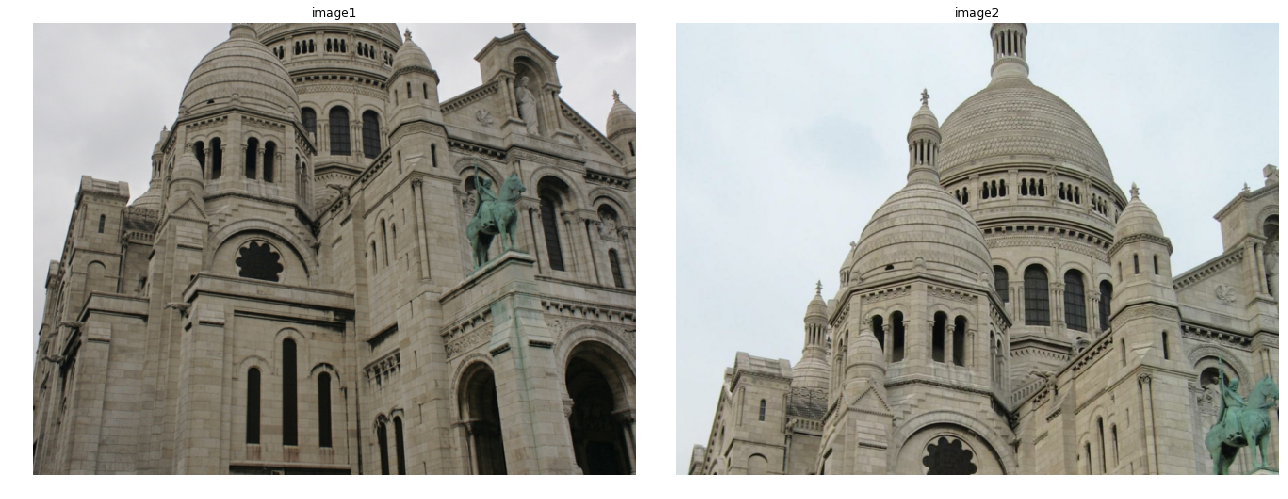

In [7]:
plot_figures({'image1': image1, 'image2': image2}, 1, 2)

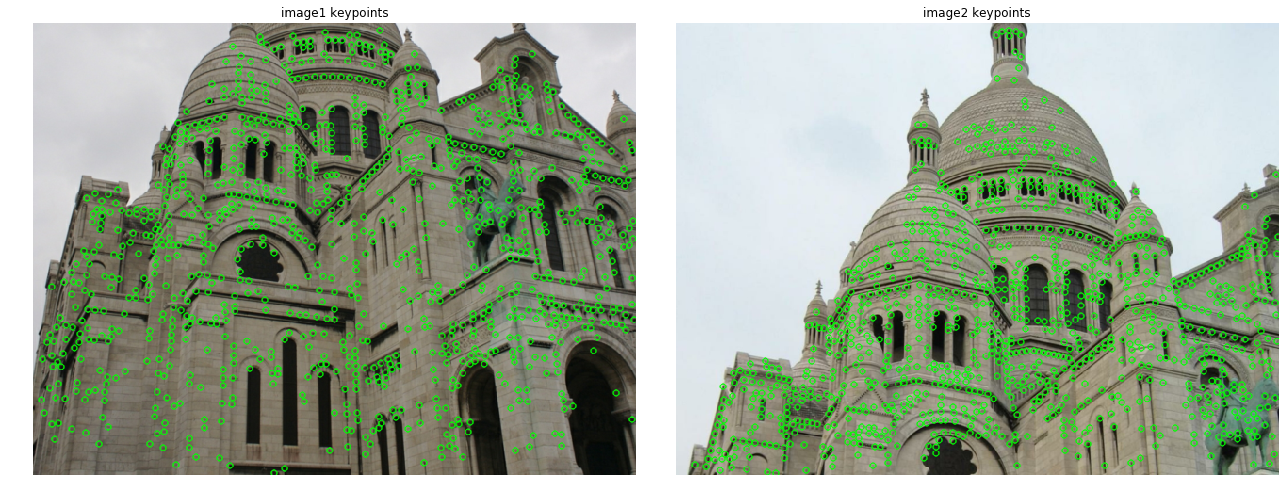

In [8]:
plot_figures({'image1 keypoints': draw_cv_kp(image1, kp1), 
              'image2 keypoints': draw_cv_kp(image2, kp2)},
             1, 2)

## 1. NN matching

For this task, you have keypoints and their corresponding descriptors. Descriptors are of size 64.

For each descriptor $kp1\_desc = d^1_i$ from the first image find the closest matching descriptor from $kp2\_desc=d^2_j$ assuming that 

$$dist(d^1_{i}, d^2_{j})=||d^1_{i} - d^2_{j}||_2$$

You need to provide the result in the form of vector $m^1$ where $m^1_i=j$.

In [ ]:
print("Shape of kp1_desc: ", kp1_desc.shape)
print("Shape of kp2_desc: ", kp2_desc.shape)

In [ ]:
# Calculate l2 distance for all possible pairs. The resulting matrix should be of size 1024 x 1024

dist = 

In [ ]:
# Find closest matching descriptor from kp2_desc. The resulting vector should be of size 1024

nn_idx1 = 

In [ ]:
plot_figures({'image1 to image2 matches': draw_cv_matches(image1, image2, 
                                                          kp1, kp2, 
                                                          nn_idx1)})

## 2. Lowe ratio test

Let $d^1_i$ be a descriptor from the first image, $d^2_j$ and $d^2_k$ be the first closest and the second closest descriptors for $d^1_i$ from the second image respectively. The match passes Lowe ratio test if $\frac{dist(d^1_i, d^2_j)}{dist(d^1_i, d^2_k)} < r$ where $0 \leq r \leq 1$ is Lowe ratio.

Assuming that $r = 0.95$ test each matching pair that you have found before and provide the result in the form of a binary mask where for each element of $nn\_idx1$ there is $True$ if the match passes the test and $False$ otherwise.

In [ ]:
r = 0.95

In [ ]:
ratio_test_mask1 = 

In [ ]:
plot_figures({'Filtered image1 to image2 matches': draw_cv_matches(image1, image2,
                                                                   kp1, kp2,
                                                                   nn_idx1,
                                                                   ratio_test_mask1)})

## 3. Mutual NN

Now, perform the same procedure for the second set of descriptors $kp2\_desc$: find correspondences $m^2$ and test them.

In [ ]:
# Find closest matching descriptor from kp1_desc. The resulting vector should be of size 1024

nn_idx2 = 

In [ ]:
ratio_test_mask2 = 

In [ ]:
plot_figures({'Filtered image2 to image1 matches': draw_cv_matches(image2, image1,
                                                                   kp2, kp1,
                                                                   nn_idx2,
                                                                   ratio_test_mask2)})

Enforce mutuality between matching descriptors so that $m^1_i \rightarrow j$ and $m^2_j \rightarrow i$. Provide the result in the form of a binary mask where for each element of $nn\_idx1$ there is $True$ if the match is mutual and $False$ otherwise. Next, ensure that mutually matched descriptors both pass the ratio test by combining previosly obtained binary masks.

In [ ]:
# Find mutual matches here

mutual_mask = 

In [ ]:
# Combine mutual_mask and ratio test masks here from the perspective of nn_idx1

match_mask = 

In [ ]:
plot_figures({'Mutual filtered matches': draw_cv_matches(image1, image2,
                                                         kp1, kp2,
                                                         nn_idx1,
                                                         match_mask)})